In [140]:
import sys
import numpy as np
import math
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from matplotlib import gridspec
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky
from IPython.display import display, HTML
from matplotlib import rc
rc('text', usetex=True)
%matplotlib inline

In [141]:
#Matplotlib style preferences
plt.rcParams.update({'xtick.minor.visible': True, 'xtick.direction': "in", 'xtick.top': True, 
                    'ytick.minor.visible': True, 'ytick.direction': "in", 'ytick.right': True})

In [142]:
#read in data from LEGA-C into Pandas dataframe
d = fits.getdata('LEGAC_DR2.fits')
df_LEGAC_DR2 = pd.DataFrame(np.array(d).byteswap().newbyteorder())

#This next line drops the rows that have NaN for velocity dispersions
df_LEGAC_DR2= df_LEGAC_DR2.dropna(subset=['SIGMA_STARS_PRIME'])

In [143]:
list(df_LEGAC_DR2) #lists column heading names

['OBJECT',
 'SPECT_ID',
 'RAJ2000',
 'DECJ2000',
 'z',
 'Filename',
 'SIGMA_STARS_PRIME',
 'SIGMA_STARS_PRIME_err',
 'SIGMA_GAS_PRIME',
 'SIGMA_GAS_PRIME_err',
 'LICK_CN1',
 'LICK_CN1_err',
 'LICK_CN2',
 'LICK_CN2_err',
 'LICK_CA4227',
 'LICK_CA4227_err',
 'LICK_G4300',
 'LICK_G4300_err',
 'LICK_FE4383',
 'LICK_FE4383_err',
 'LICK_CA4455',
 'LICK_CA4455_err',
 'LICK_FE4531',
 'LICK_FE4531_err',
 'LICK_C4668',
 'LICK_C4668_err',
 'LICK_HB',
 'LICK_HB_err',
 'LICK_HD_A',
 'LICK_HD_A_err',
 'LICK_HG_A',
 'LICK_HG_A_err',
 'LICK_HD_F',
 'LICK_HD_F_err',
 'LICK_HG_F',
 'LICK_HG_F_err',
 'LICK_D4000_N',
 'LICK_D4000_N_err',
 'Hd_flux',
 'Hd_err',
 'Hd_EW',
 'Hd_EW_err',
 'Hg_flux',
 'Hg_err',
 'Hg_EW',
 'Hg_EW_err',
 'Hb_flux',
 'Hb_err',
 'Hb_EW',
 'Hb_EW_err',
 'OII_3727_flux',
 'OII_3727_err',
 'OII_3727_EW',
 'OII_3727_EW_err',
 'OIII_4959_flux',
 'OIII_4959_err',
 'OIII_4959_EW',
 'OIII_4959_EW_err',
 'OIII_5007_flux',
 'OIII_5007_err',
 'OIII_5007_EW',
 'OIII_5007_EW_err',
 'f_ppxf',
 

In [144]:
df_LEGAC_DR2.head() #prints first 5 rows

,OBJECT,SPECT_ID,RAJ2000,DECJ2000,z,Filename,SIGMA_STARS_PRIME,SIGMA_STARS_PRIME_err,SIGMA_GAS_PRIME,SIGMA_GAS_PRIME_err,...,f_ppxf,f_z,f_spec,f_primary,f_use,f_int,Tcor,SN,SN_RF_4000,SN_OBS_8030
0,126153,b'M1_126153 ',150.144653,2.278511,0.6823,b'legac_M1_126153_v2.0.fits ',115.000000,13.800000,NaN,NaN,...,0,0,0,1,1,0,45.755501,10.3,10.0,13.100000
1,126275,b'M1_126275 ',150.301697,2.278996,0.9297,b'legac_M1_126275_v2.0.fits ',225.000000,11.000000,NaN,NaN,...,0,0,0,1,1,0,5.762800,10.6,17.4,18.000000
2,126578,b'M1_126578 ',150.098053,2.281367,0.7504,b'legac_M1_126578_v2.0.fits ',169.399994,13.100000,NaN,NaN,...,0,0,0,1,1,0,3.362100,15.1,12.3,20.900000
3,126585,b'M1_126585 ',150.323944,2.282332,0.9822,b'legac_M1_126585_v2.0.fits ',308.000000,12.100000,NaN,NaN,...,0,0,0,1,1,0,3.371500,13.6,25.0,25.299999
4,126753,b'M1_126753 ',150.090652,2.285158,0.7500,b'legac_M1_126753_v2.0.fits ',262.000000,41.299999,395.899994,73.599998,...,1,0,0,1,0,0,16.937401,3.9,3.2,5.100000


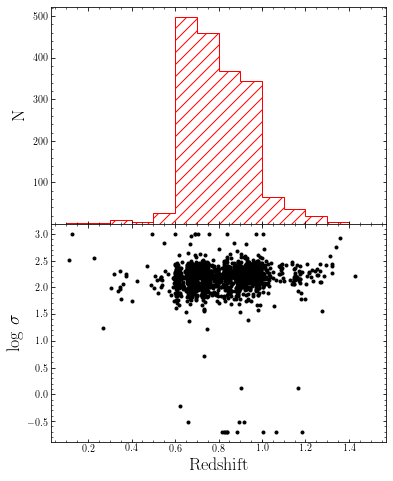

In [145]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.subplots_adjust(hspace=0)
#ax1.axes.set_xlim([0.25, 1.25])
#ax1.axes.set_ylim([0, 8])
ax1.hist(df_LEGAC_DR2['z'], bins=14, range=(0.1, 1.5), histtype='step', color='r', hatch='//', label="Passive field")
ax1.yaxis.get_major_ticks()[0].label1.set_visible(False)
ax1.set_xlabel("$\mathrm{Redshift}$", fontsize=16)
ax1.set_ylabel("$\mathrm{N}$", fontsize=18)
# ax1.text(1.15, 7, r'(a)', fontsize=14, fontname="Times New Roman")

#ax2.axes.set_xlim([0.25, 1.25])
ax2.plot(df_LEGAC_DR2['z'], np.log10(df_LEGAC_DR2['SIGMA_STARS_PRIME']), '.', color='black')
#ax2.errorbar(df_LEGAC_DR2['z'], np.log10(df_LEGAC_DR2['SIGMA_STARS_PRIME']), yerr=np.log10(df_LEGAC_DR2['SIGMA_STARS_PRIME_err']), fmt='none', marker=None, ecolor='k', capsize=0)
#ax2.set_yticks(np.arange(1.8, 2.8, 0.2))
#ax2.set_ylim((1.8, 2.6))
ax2.set_xlabel("$\mathrm{Redshift}$", fontsize=18)
ax2.set_ylabel("$\mathrm{log\  \sigma}$", fontsize=18)
#ax2.legend(loc='best', numpoints=1, frameon=False)
#ax2.text(1.15, 2.5, r'(b)', fontsize=14, fontname="Times New Roman")
plt.show()

Should I exclude galaxies with z < 0.6 and z > 1.0? Should we have a velocity dispersion cutoff, as well? What would be a good bin size for subsamples (perhaps 0.1 bin sizes, giving 4 different subsamples)?

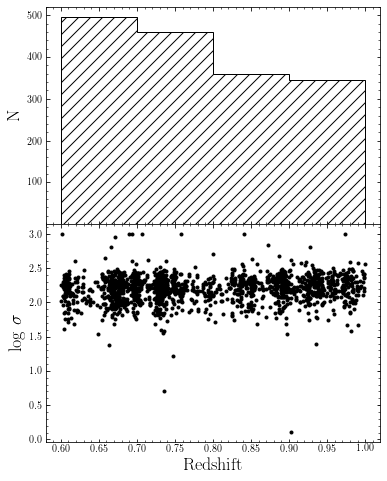

In [146]:
z_high = df_LEGAC_DR2['z'] <= 1.0
z_low = df_LEGAC_DR2['z'] >= 0.6
lsigma_cutoff = np.log10(df_LEGAC_DR2['SIGMA_STARS_PRIME'])>0
#LEGAC_limits will be the df with the redshift limits shown above
LEGAC_limits = df_LEGAC_DR2[z_high & z_low & lsigma_cutoff]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.subplots_adjust(hspace=0)
#ax1.axes.set_xlim([0.25, 1.25])
#ax1.axes.set_ylim([0, 8])
ax1.hist(LEGAC_limits['z'], bins=4, range=(0.6, 1.0), histtype='step', color='k', hatch='//')
ax1.yaxis.get_major_ticks()[0].label1.set_visible(False)
ax1.set_xlabel("$\mathrm{Redshift}$", fontsize=16)
ax1.set_ylabel("$\mathrm{N}$", fontsize=18)
# ax1.text(1.15, 7, r'(a)', fontsize=14, fontname="Times New Roman")

#ax2.axes.set_xlim([0.25, 1.25])
ax2.plot(LEGAC_limits['z'], np.log10(LEGAC_limits['SIGMA_STARS_PRIME']), '.', color='black')
#ax2.errorbar(df_LEGAC_DR2['z'], np.log10(df_LEGAC_DR2['SIGMA_STARS_PRIME']), yerr=np.log10(df_LEGAC_DR2['SIGMA_STARS_PRIME_err']), fmt='none', marker=None, ecolor='k', capsize=0)
#ax2.set_yticks(np.arange(1.8, 2.8, 0.2))
#ax2.set_ylim((1.8, 2.6))
ax2.set_xlabel("$\mathrm{Redshift}$", fontsize=18)
ax2.set_ylabel("$\mathrm{log\  \sigma}$", fontsize=18)
#ax2.legend(loc='best', numpoints=1, frameon=False)
#ax2.text(1.15, 2.5, r'(b)', fontsize=14, fontname="Times New Roman")
plt.show()

$\mathrm{(H \delta _A + H \gamma _A)' = -2.5\ log\ (1\ -\ \frac{H \delta _A\ +\ H \gamma _A}{43.75\ +\ 38.75})}$


from Kuntschner, H. 2000, MNRAS, 315, 184

In [147]:
HDGA_A = -2.5*np.log10(1-((LEGAC_limits['LICK_HD_A']+LEGAC_limits['LICK_HG_A'])/(43.75+38.75)))
HDGA_A = pd.Series(HDGA_A)
LEGAC_limits['HDGA_A'] = HDGA_A.values

/Users/cwoodrum/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


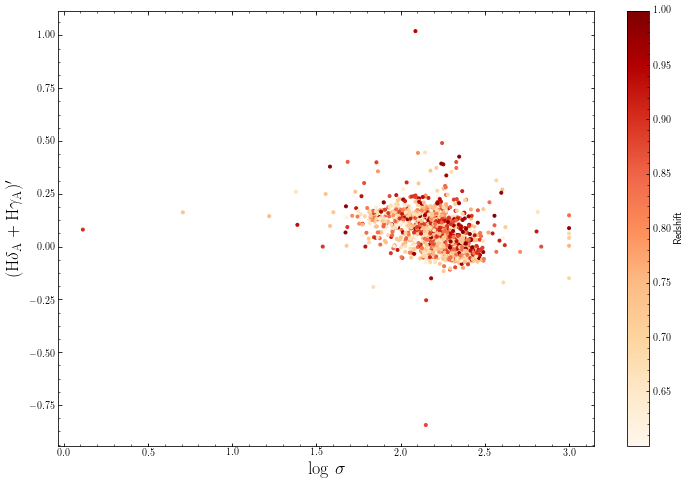

In [148]:
#plt.plot(np.log10(LEGAC_limits['SIGMA_STARS_PRIME']), LEGAC_limits['HDGA_A'], '.', color='k')
fig,ax=plt.subplots(figsize=(12,8))
cb = plt.scatter(np.log10(LEGAC_limits['SIGMA_STARS_PRIME']), LEGAC_limits['HDGA_A'], c=LEGAC_limits['z'], marker='.',cmap=plt.cm.get_cmap('OrRd'))
plt.colorbar(cb, label="Redshift")
plt.xlabel("$\mathrm{log\  \sigma}$", fontsize=18)
plt.ylabel("$\mathrm{(H \delta _A + H \gamma _A)'}$", fontsize=18)
plt.show()

/Users/cwoodrum/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/cwoodrum/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


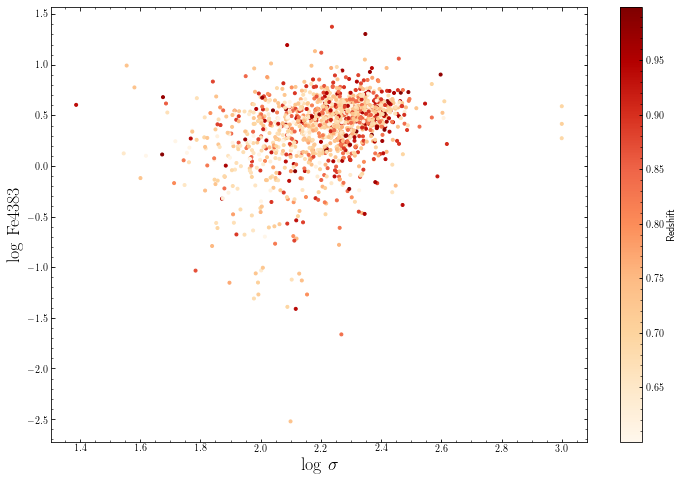

In [149]:
fig,ax=plt.subplots(figsize=(12,8))
cb = plt.scatter(np.log10(LEGAC_limits['SIGMA_STARS_PRIME']), np.log10(LEGAC_limits['LICK_FE4383']), c=LEGAC_limits['z'], marker='.',cmap=plt.cm.get_cmap('OrRd'))
plt.colorbar(cb, label="Redshift")
#plt.plot(np.log10(LEGAC_limits['SIGMA_STARS_PRIME']), np.log10(LEGAC_limits['LICK_FE4383']), '.', color='k')
plt.xlabel("$\mathrm{log\  \sigma}$", fontsize=18)
plt.ylabel("$\mathrm{log\ Fe4383}$", fontsize=18)
plt.show()

In [156]:
#Read in Density field, Cosmic Web environment, and galaxy type measurements from Darvish 2017
df_cosmos_darvish = pd.read_csv('COSMOS_Darvish1.txt', sep=r"\s+", comment="#")
df_cosmos_darvish.columns = map(str.lower, df_cosmos_darvish.columns)

flag_removal = df_cosmos_darvish['flag'] < 1
#Get rid of the galaxies with "bad" flag of 1
df_cosmos_darvish = df_cosmos_darvish[flag_removal]

df_cosmos_darvish.head()

,id,ra,dec,photo_z,density,overdensity,s_cluster,s_filament,environment,group_id,n_g,galaxy_type,flag
871,243325,150.041038,1.679104,0.2200,2.17,0.78,0.000411,0.236093,filament,74,3,central,0
936,244682,149.468224,1.660186,0.6036,3.38,1.45,0.050772,0.062457,filament,1656,5,central,0
1022,246373,149.854923,1.661894,0.2611,0.33,0.12,0.000004,0.002267,field,-99,-99,isolated,0
1036,246689,150.185677,1.661698,0.2200,55.17,19.76,0.846036,0.302123,cluster,72,48,satellite,0
1059,247106,150.186761,1.660215,0.3499,4.83,1.93,0.047000,0.246992,filament,362,62,central,0


Number of xmatch sources: 1660
Test single source
<SkyCoord (ICRS): (ra, dec) in deg
    ( 150.144646,  2.278509)>
<SkyCoord (ICRS): (ra, dec) in deg
    ( 150.14465332,  2.27851105)>
dra, ddec: -0.0263322896472608 -0.007370507745689729
Test array
<SkyCoord (ICRS): (ra, dec) in deg
    [( 150.144646,  2.278509), ( 150.301665,  2.278965),
     ( 150.098029,  2.28138 ), ..., ( 150.508779,  2.268612),
     ( 150.451565,  2.273961), ( 150.478341,  2.271294)]>
<SkyCoord (ICRS): (ra, dec) in deg
    [( 150.14465332,  2.27851105), ( 150.30169678,  2.27899599),
     ( 150.09805298,  2.28136706), ..., ( 150.50880432,  2.26862693),
     ( 150.45158386,  2.27396297), ( 150.47836304,  2.27131009)]>


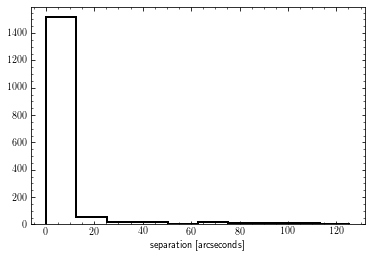

In [157]:
#The following code matches the Darvish data with the LEGA-C data
ra_ref = LEGAC_limits['RAJ2000']
dec_ref = LEGAC_limits['DECJ2000']
radec_ref = SkyCoord(ra_ref, dec_ref, unit=(u.degree, u.degree), frame='icrs')
 
ra_darvish = df_cosmos_darvish['ra']
dec_darvish = df_cosmos_darvish['dec']
radec_darvish = SkyCoord(ra_darvish, dec_darvish, unit=(u.degree, u.degree), frame='icrs')
 
# nearest pairwise xmatch
idx, d2d, d3d = match_coordinates_sky(radec_ref, radec_darvish)
 
idx, d2d, d3d = radec_ref.match_to_catalog_sky(radec_darvish)
print('Number of xmatch sources:', len(idx))
 
matches = radec_darvish[idx]
print('Test single source')
print(matches[0])
print(radec_ref[0])
dra, ddec = radec_ref[0].spherical_offsets_to(matches[0])
print('dra, ddec:', dra.arcsec, ddec.arcsec)
 
print('Test array')
print(matches)
print(radec_ref)
plt.hist(d2d.arcsec, histtype='step', color='black', linewidth='2')
plt.xlabel("separation [arcseconds]")
plt.show()

/Users/cwoodrum/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/cwoodrum/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,OBJECT,SPECT_ID,RAJ2000,DECJ2000,z,Filename,SIGMA_STARS_PRIME,SIGMA_STARS_PRIME_err,SIGMA_GAS_PRIME,SIGMA_GAS_PRIME_err,...,photo_z,density,overdensity,s_cluster,s_filament,environment,group_id,n_g,galaxy_type,flag
3,126585,b'M1_126585 ',150.323944,2.282332,0.982200,b'legac_M1_126585_v2.0.fits ',308.000000,1.210000e+01,NaN,NaN,...,0.9897,11.80,5.06,0.416545,0.243806,cluster,5066,22,central,0
4,126585,b'M2_126585 ',150.323944,2.282332,0.982100,b'legac_M2_126585_v2.0.fits ',309.500000,1.360000e+01,NaN,NaN,...,0.9897,11.80,5.06,0.416545,0.243806,cluster,5066,22,central,0
15,128528,b'M1_128528 ',150.324768,2.305798,0.657900,b'legac_M1_128528_v2.0.fits ',93.699997,1.530000e+01,82.099998,1.900000,...,0.8998,5.24,2.17,0.057069,0.012830,field,-99,-99,isolated,0
16,128528,b'M2_128528 ',150.324768,2.305798,0.657900,b'legac_M2_128528_v2.0.fits ',443.399994,6.070000e+01,80.400002,2.400000,...,0.8998,5.24,2.17,0.057069,0.012830,field,-99,-99,isolated,0
27,130902,b'M1_130902 ',150.154175,2.334795,0.758500,b'legac_M1_130902_v2.0.fits ',104.099998,1.100000e+01,108.900002,5.800000,...,0.7231,2.24,0.91,0.001504,0.003032,field,2588,2,satellite,0
28,130902,b'M2_130902 ',150.154175,2.334795,0.758300,b'legac_M2_130902_v2.0.fits ',1000.000000,0.000000e+00,NaN,NaN,...,0.7231,2.24,0.91,0.001504,0.003032,field,2588,2,satellite,0
30,131104,b'M1_131104 ',150.166046,2.331842,0.683500,b'legac_M1_131104_v2.0.fits ',167.800003,1.020000e+01,115.500000,14.800000,...,0.6613,2.64,1.10,0.006079,0.041516,filament,-99,-99,isolated,0
31,131104,b'M2_131104 ',150.166046,2.331842,0.682800,b'legac_M2_131104_v2.0.fits ',101.900002,1.000000e+01,88.400002,11.400000,...,0.6613,2.64,1.10,0.006079,0.041516,filament,-99,-99,isolated,0
35,131951,b'M1_131951 ',150.161835,2.340945,0.686500,b'legac_M1_131951_v2.0.fits ',100.000000,6.500000e+00,155.300003,17.200001,...,0.6805,6.17,2.54,0.029202,0.101542,filament,2161,13,central,0
36,131951,b'M2_131951 ',150.161835,2.340945,0.686600,b'legac_M2_131951_v2.0.fits ',94.599998,8.000000e+00,152.199997,27.900000,...,0.6805,6.17,2.54,0.029202,0.101542,filament,2161,13,central,0


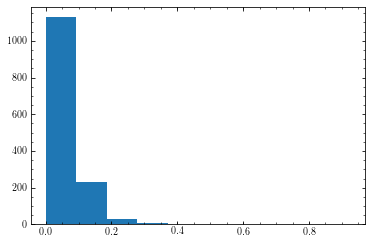

In [158]:
count = []
for i in range(len(df_cosmos_darvish['ra'])):
    count.append(i)
LEGAC_limits['key'] = idx
LEGAC_limits['d2d'] = d2d.arcsec
df_cosmos_darvish['key'] = count
merged_df = pd.merge(LEGAC_limits, df_cosmos_darvish, on=['key'])
arc_limit = merged_df['d2d'] < 1
merged_df_match = merged_df[arc_limit]
plt.hist(merged_df_match['d2d'])

#This looks for duplicate matches
duplicates = merged_df_match.key.value_counts()
duplicates[duplicates > 1]

ids = merged_df_match["key"]
merged_df_match[ids.isin(ids[ids.duplicated()])]

#There are many duplicates, I think this is because LEGA-C has multiple entries for the same galaxy

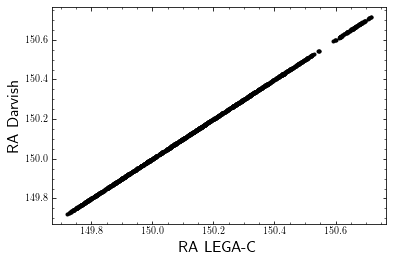

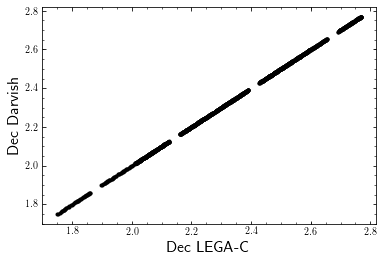

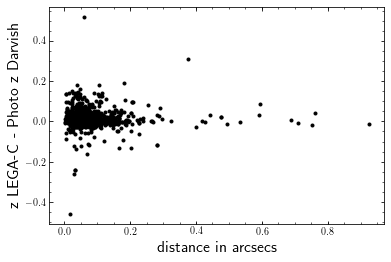

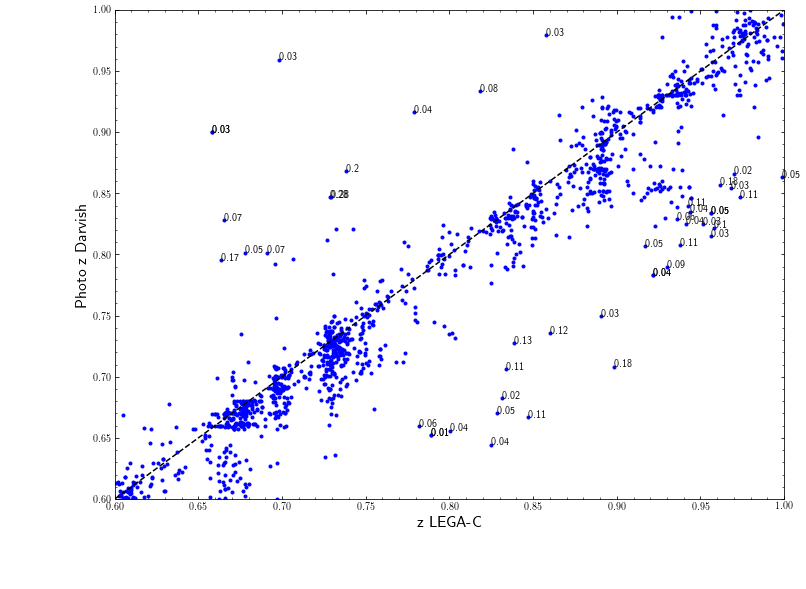

In [165]:
plt.plot(merged_df_match['RAJ2000'], merged_df_match['ra'], 'k.')
plt.xlabel("RA LEGA-C", fontsize=16)
plt.ylabel('RA Darvish', fontsize=16)
plt.show()

plt.plot(merged_df_match['DECJ2000'], merged_df_match['dec'], 'k.')
plt.xlabel("Dec LEGA-C", fontsize=16)
plt.ylabel('Dec Darvish', fontsize=16)
plt.show()

diffs = [a - b for a, b in zip(merged_df_match['z'].values, merged_df_match['photo_z'].values)]
plt.plot(merged_df_match['d2d'], diffs, 'k.')
plt.xlabel("distance in arcsecs", fontsize=16)
plt.ylabel('z LEGA-C - Photo z Darvish', fontsize=16)

#Testing matches
fig, ax = plt.subplots(figsize=(12,9))
plt.plot(merged_df_match['z'], merged_df_match['photo_z'], 'b.')
plt.ylim(0.6, 1)
plt.xlim(0.6, 1)
x=(0.3, 0.5, 0.8, 1.2)
y=(0.3, 0.5, 0.8, 1.2)
plt.xlabel("z LEGA-C", fontsize=16)
plt.ylabel('Photo z Darvish', fontsize=16)
plt.plot(x, y, 'k--')
d2d_list = np.array(merged_df_match['d2d'].values).tolist()

#Plot the distance between matches if their redshift difference is > 0.1
for i, txt in enumerate(d2d_list):
    if np.abs(diffs[i]) > 0.1:
        ax.annotate(float("{0:.2f}".format(txt)), (merged_df_match['z'].values[i],merged_df_match['photo_z'].values[i]))
plt.show()

In [179]:
field = merged_df_match['environment'] == "field"
cluster =  merged_df_match['environment'] == "cluster"
filament =  merged_df_match['environment'] == "filament"

df_field = merged_df_match[field]
df_cluster = merged_df_match[cluster]
df_filament = merged_df_match[filament]

/Users/cwoodrum/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/cwoodrum/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/Users/cwoodrum/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cwoodrum/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cwoodrum/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/cwoodrum/anaconda/envs/astroconda/lib/python3.5/site-pa

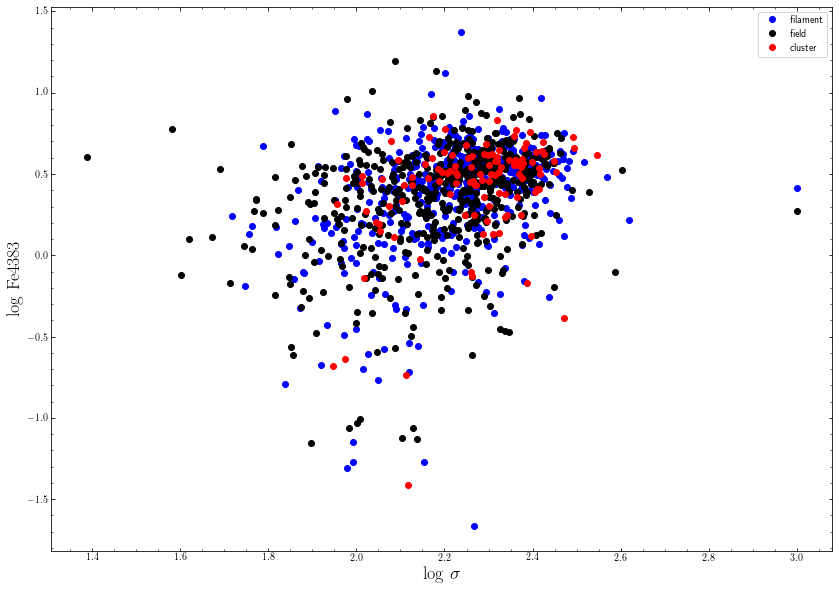

In [177]:
fig,ax=plt.subplots(figsize=(14,10))
plt.plot(np.log10(df_filament['SIGMA_STARS_PRIME']), np.log10(df_filament['LICK_FE4383']), 'o',color='blue', label="filament")
plt.plot(np.log10(df_field['SIGMA_STARS_PRIME']), np.log10(df_field['LICK_FE4383']), 'o',color="black", label="field")
plt.plot(np.log10(df_cluster['SIGMA_STARS_PRIME']), np.log10(df_cluster['LICK_FE4383']), 'o',color='red', label="cluster")
plt.legend()
#plt.plot(np.log10(LEGAC_limits['SIGMA_STARS_PRIME']), np.log10(LEGAC_limits['LICK_FE4383']), '.', color='k')
plt.xlabel("$\mathrm{log\  \sigma}$", fontsize=18)
plt.ylabel("$\mathrm{log\ Fe4383}$", fontsize=18)
plt.show()

/Users/cwoodrum/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/cwoodrum/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/Users/cwoodrum/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cwoodrum/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cwoodrum/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/cwoodrum/anaconda/envs/astroconda/lib/python3.5/site-pa

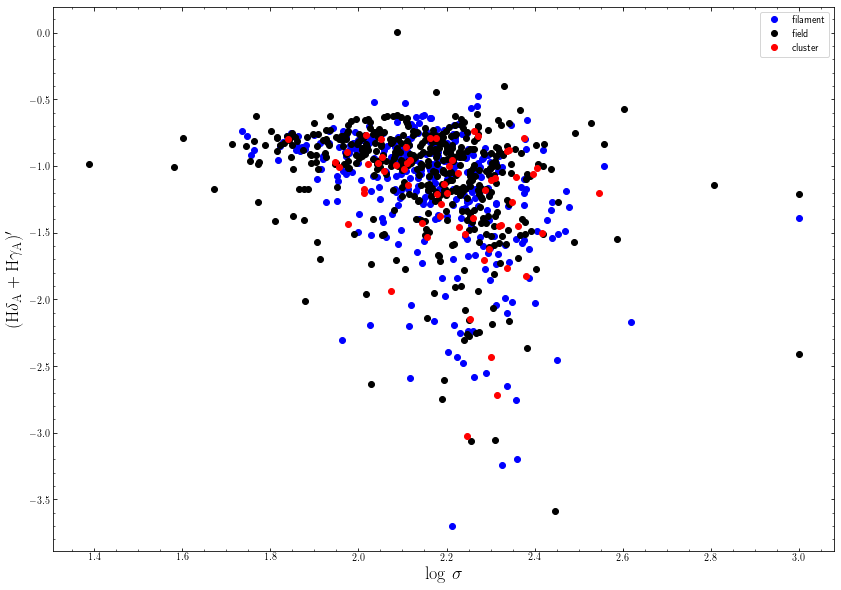

In [176]:
fig,ax=plt.subplots(figsize=(14,10))
plt.plot(np.log10(df_filament['SIGMA_STARS_PRIME']), np.log10(df_filament['HDGA_A']), 'o',color='blue', label="filament")
plt.plot(np.log10(df_field['SIGMA_STARS_PRIME']), np.log10(df_field['HDGA_A']), 'o',color="black", label="field")
plt.plot(np.log10(df_cluster['SIGMA_STARS_PRIME']), np.log10(df_cluster['HDGA_A']), 'o',color='red', label="cluster")
plt.legend()
#plt.plot(np.log10(LEGAC_limits['SIGMA_STARS_PRIME']), np.log10(LEGAC_limits['LICK_FE4383']), '.', color='k')
plt.xlabel("$\mathrm{log\  \sigma}$", fontsize=18)
plt.ylabel("$\mathrm{(H \delta _A + H \gamma _A)'}$", fontsize=18)
plt.show()